# DBSCAN Clustering

In [2]:
# import the libraries
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
# import Wholesale customers.csv dataset
df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


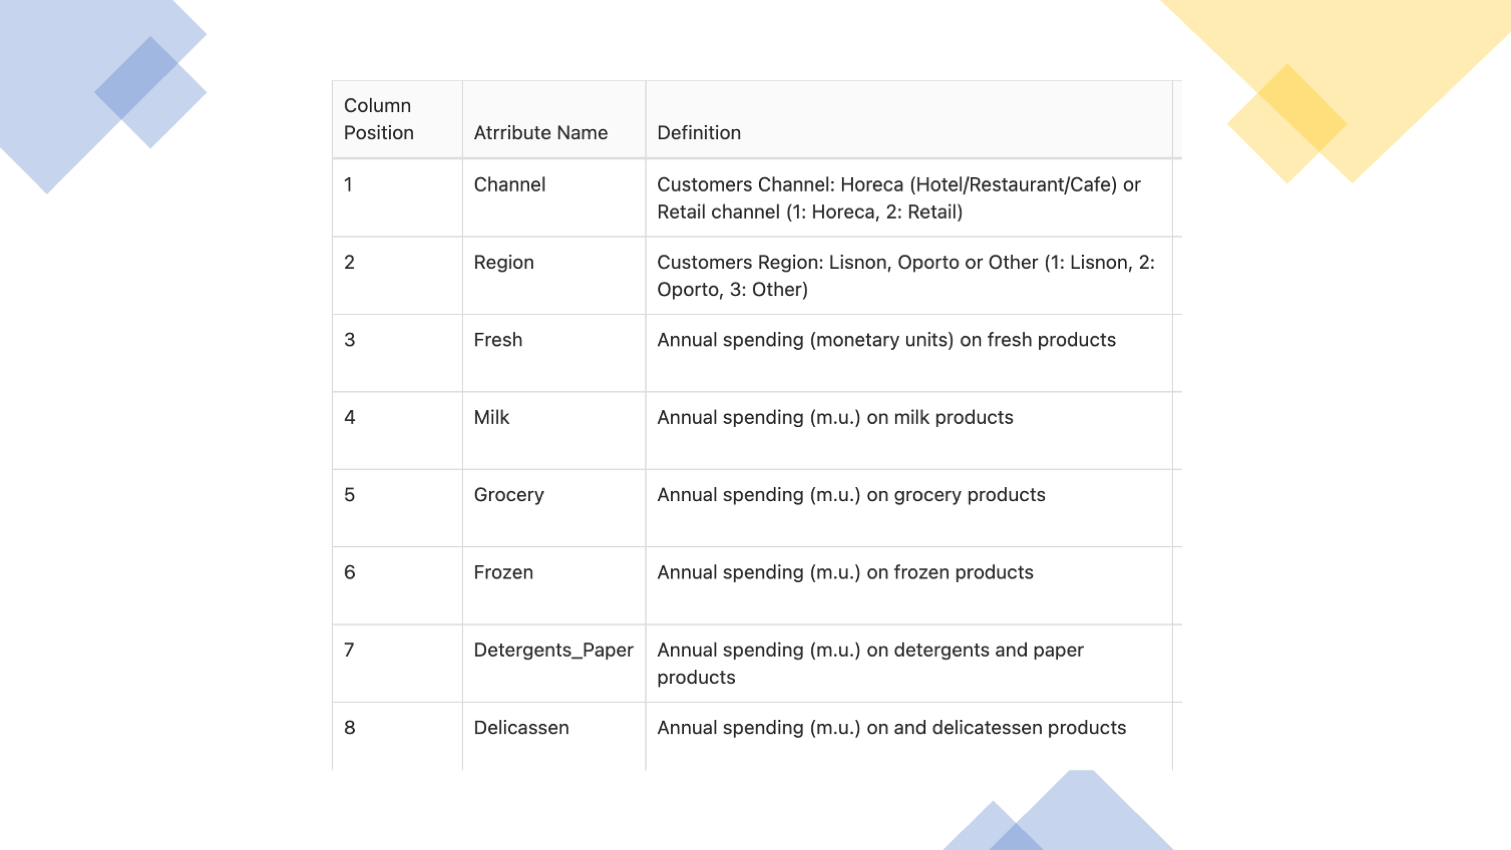

In [4]:
# summary of the numeric features of the dataset
df.describe().round()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.0,440.0,440.0,440.0,440.0,440.0,440.0,440.0
mean,1.0,3.0,12000.0,5796.0,7951.0,3072.0,2881.0,1525.0
std,0.0,1.0,12647.0,7380.0,9503.0,4855.0,4768.0,2820.0
min,1.0,1.0,3.0,55.0,3.0,25.0,3.0,3.0
25%,1.0,2.0,3128.0,1533.0,2153.0,742.0,257.0,408.0
50%,1.0,3.0,8504.0,3627.0,4756.0,1526.0,816.0,966.0
75%,2.0,3.0,16934.0,7190.0,10656.0,3554.0,3922.0,1820.0
max,2.0,3.0,112151.0,73498.0,92780.0,60869.0,40827.0,47943.0


In [5]:
# datatypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
# exclude the Channel and Region features as they are categorical
df = df.drop(['Channel', 'Region'], axis=1)

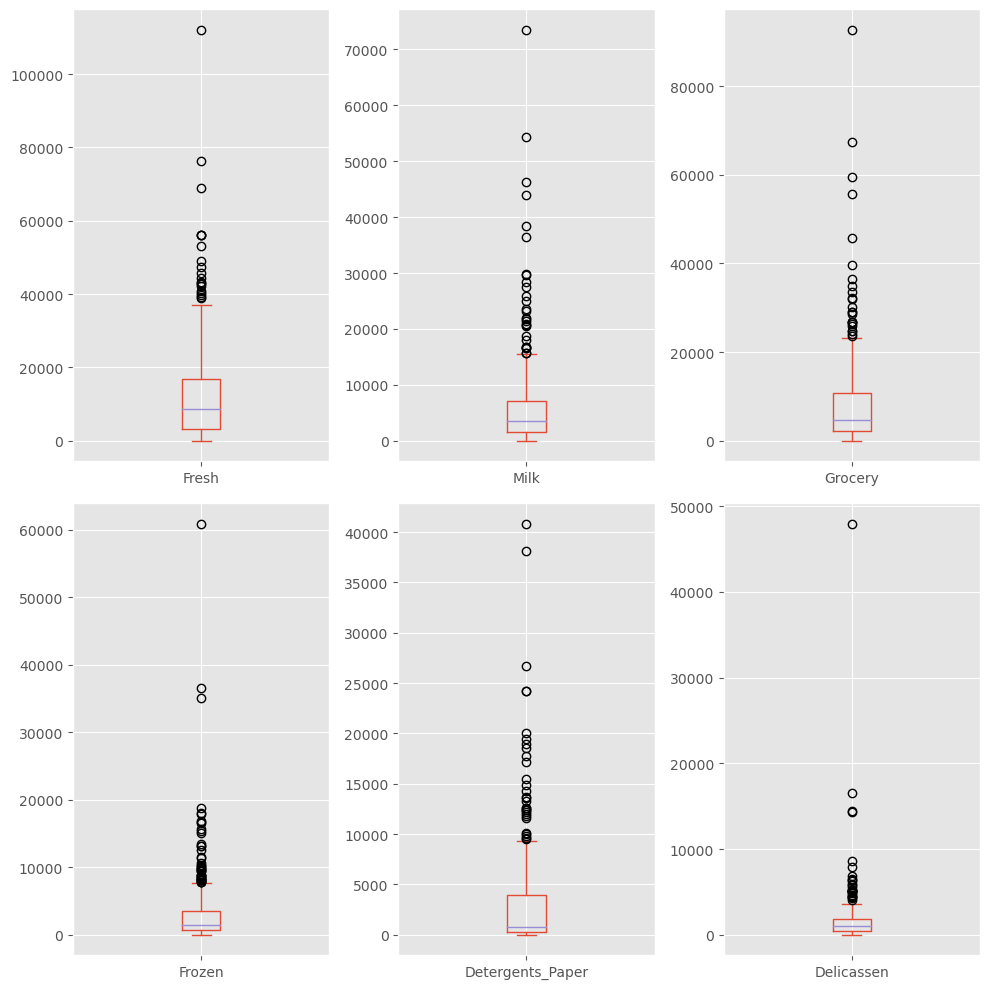

In [9]:
# distribution of the features - boxplot as a 2x3 grid of subplots
df.plot(kind='box', subplots=True, layout=(2,3),figsize=(10,10))
plt.tight_layout();

In [10]:
# scale the features using standard scaler from sklearn
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [11]:
df_scaled.describe().round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.95,-0.78,-0.84,-0.63,-0.60,-0.54
25%,-0.70,-0.58,-0.61,-0.48,-0.55,-0.40
50%,-0.28,-0.29,-0.34,-0.32,-0.43,-0.20
75%,0.39,0.19,0.28,0.10,0.22,0.10
max,7.93,9.18,8.94,11.92,7.97,16.48


In [12]:
# Instantiate a DBSCAN model object and fit it to the scaled data - take some values for eps and min_samples
# eps = 0.4, min_samples = 2
dbscan = DBSCAN(eps=0.4, min_samples=2)


In [13]:
# get the labels of the clusters
labels = dbscan.fit_predict(df_scaled)
labels

array([-1,  0, -1,  1, -1,  2,  3,  0,  1, -1, -1,  1, -1, -1, -1,  1,  0,
       -1, -1, -1,  2,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  4,  5, -1,  6, -1, -1, -1, -1,
        1, -1,  7,  1,  1, -1,  7,  1,  0,  3, -1, -1,  8,  1, -1,  9, -1,
       -1,  1, -1, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,  7, -1,  1,  3,
       -1, -1, -1, -1, -1,  1,  1, -1, -1,  7,  1,  9,  1,  1,  1, -1, 10,
        0, -1,  1,  1, 11,  8, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, 12, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1, -1, -1, -1,  1, 13, -1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1, -1, -1,  1,  0,  7,  0,  1,  1, -1, -1, -1, 14,  1,  1,  1,
        7, -1, -1, 15,  1,  0, -1, -1,  1, -1, 16, -1,  7, -1,  1, -1,  1,
       -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  0,  1,  1, -1, -1, -1,  1,
        1,  4,  1, -1, -1, -1,  1, -1,  1,  0, 17, 10, -1,  1, -1,  1,  1,
        5,  1,  1,  1,  1

The -1 labels represent the noisy observations and the other labels 0,1,... represent the cluster labels assigned to the observations.

In [14]:
# add the labels to the original dataset as a new feature
df['cluster_labels'] = labels
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_labels
0,12669,9656,7561,214,2674,1338,-1
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,-1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,-1


In [15]:
# get the cluster profiles - mean values of the features
df.groupby('cluster_labels').mean().round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster_labels,,,,,,
-1,16114.55,9287.22,12501.97,4577.46,4675.54,2359.53
0,4354.71,6406.47,9749.53,1005.29,3884.82,1637.65
1,9275.73,1905.71,2508.91,2251.12,454.72,732.71
2,15835.71,6156.71,7183.14,1104.57,2663.86,1816.71
3,9786.00,3330.00,6607.20,971.00,3502.80,353.00
4,868.50,11403.00,23797.00,871.00,9397.00,391.00
5,7533.00,7265.00,10558.50,316.00,4392.50,152.00
6,4785.50,13468.00,21762.50,1754.00,7175.00,1497.50
7,2383.00,9902.33,12194.67,553.11,6746.44,491.33


# Case Study 2: DBSCAN Clustering

In [ ]:
# from sklearn.datasets import load_iris,load_boston,load_wine,load_breast_cancer

In [ ]:
# from sklearn.datasets import make_classification,make_regression

In [16]:
from sklearn.datasets import make_moons, make_blobs

In [18]:
# make moons
X,y = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=1)

In [19]:
X_df = pd.DataFrame(X, columns=['X1', 'X2'])
X_df['y'] = y

In [20]:
# print the data
X_df.head()

,X1,X2,y
0,0.131942,0.340446,1
1,1.400253,-0.559485,1
2,-0.855419,0.143946,0
3,-0.693063,0.837674,0
4,0.024959,1.145901,0


In [22]:
# print the labels
# y

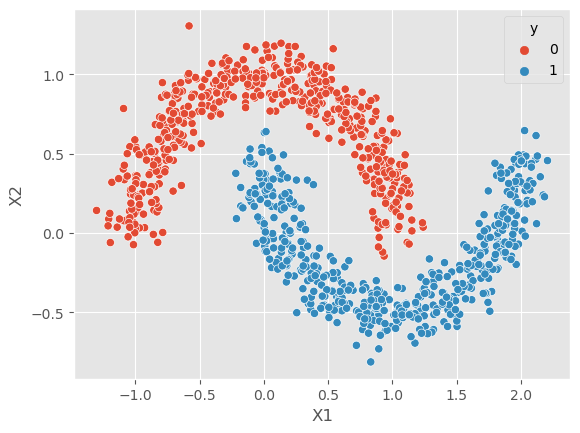

In [23]:
# visualize the data as a scatter plot
sns.scatterplot(x='X1', y='X2', hue='y', data=X_df);

In [24]:
# instantiate a DBSCAN model object with some value of eps and min samples and fit it to the data
dbscan_moons = DBSCAN(eps=0.2, min_samples=5)
labels_moon = dbscan_moons.fit_predict(X_df[['X1', 'X2']])
labels_moon

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

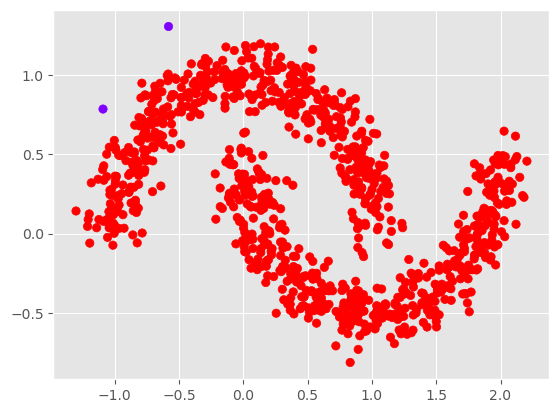

In [25]:
# plot the clusters with labels
plt.scatter(X_df['X1'], X_df['X2'], c=labels_moon, cmap='rainbow');

In [26]:
# take a set of epsilons and min_samples for experimentation, say 4 each
epsilon = [0.1, 0.2, 0.3, 0.4]
samples = [2, 3, 4, 5]

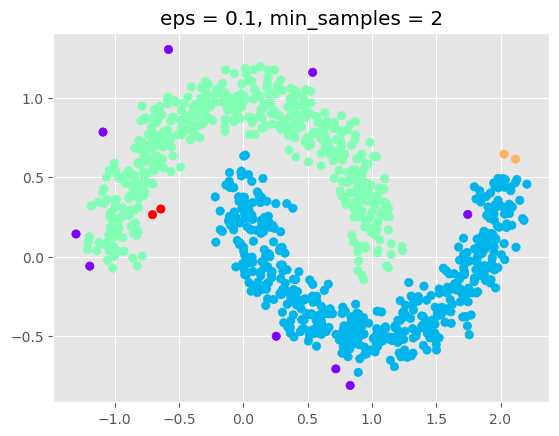

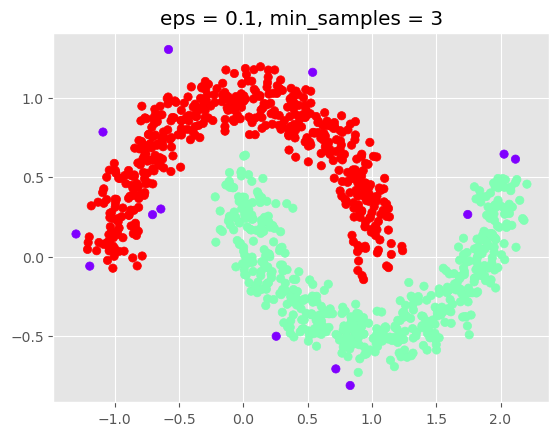

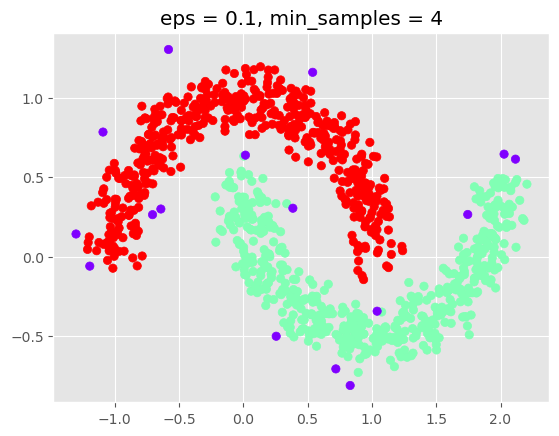

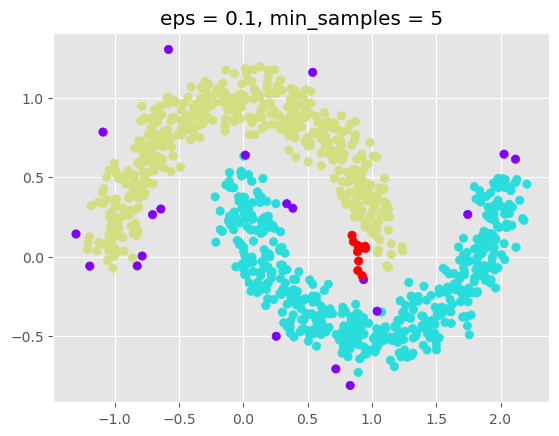

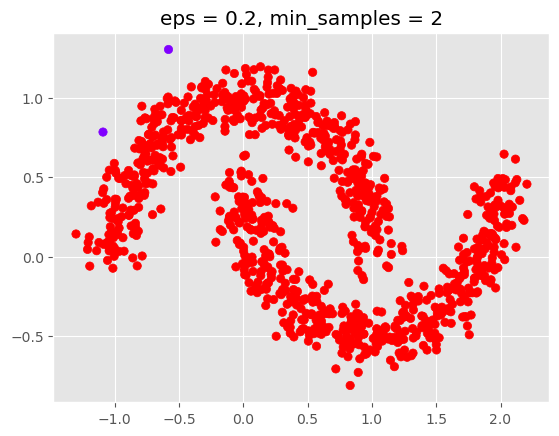

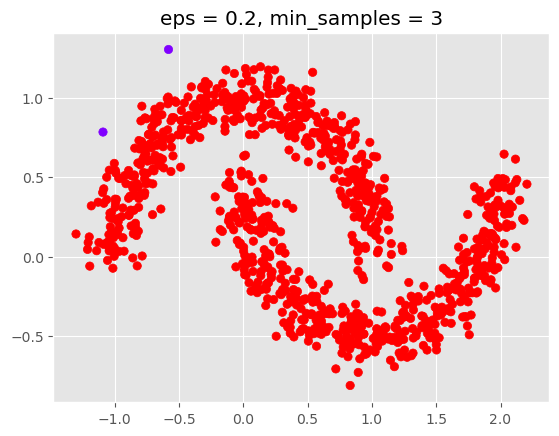

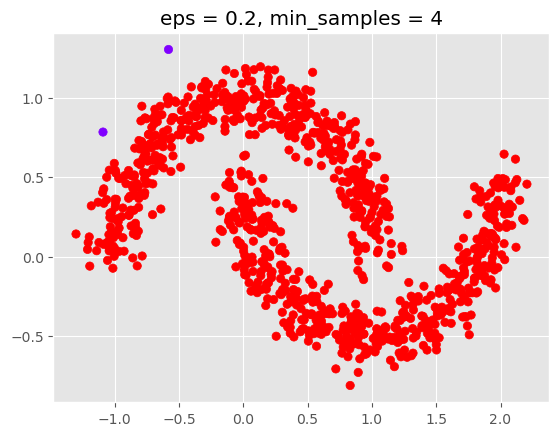

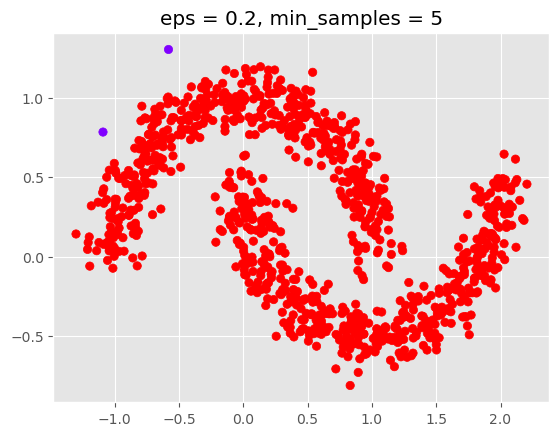

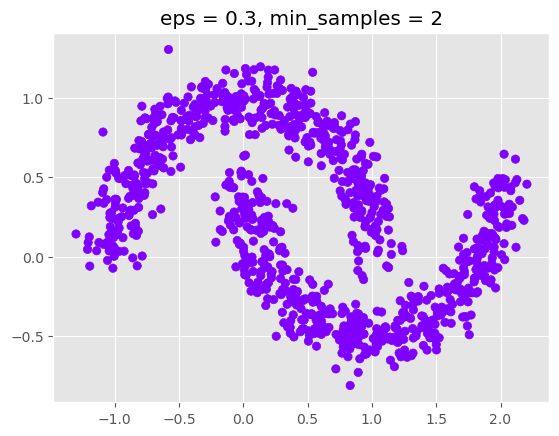

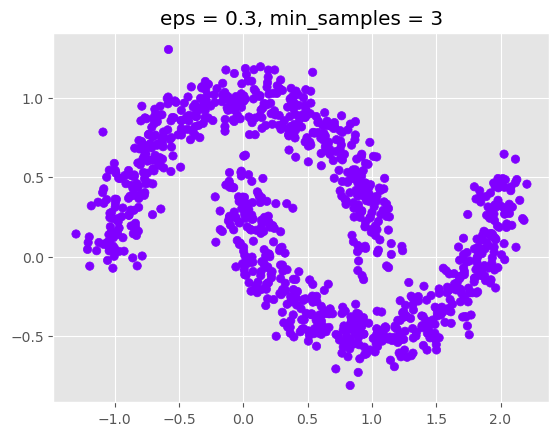

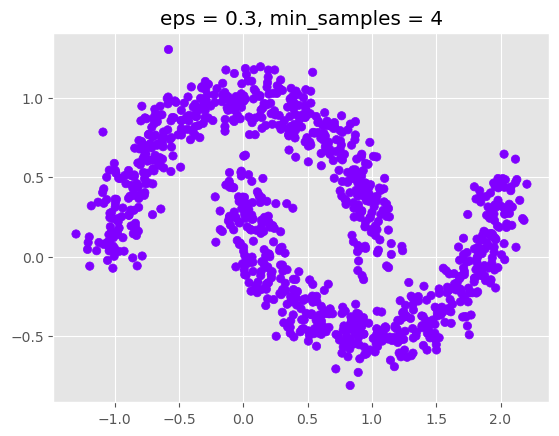

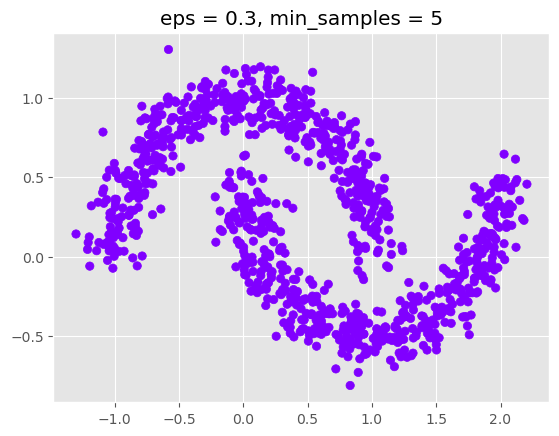

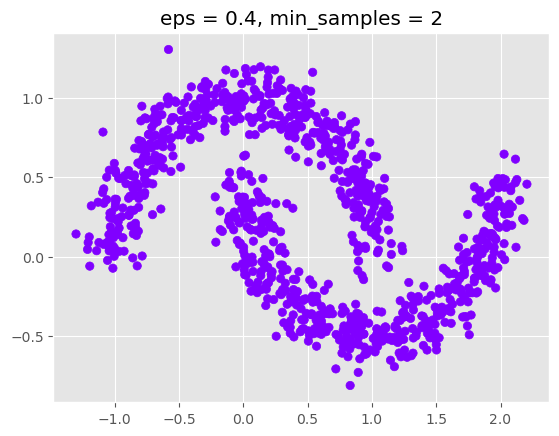

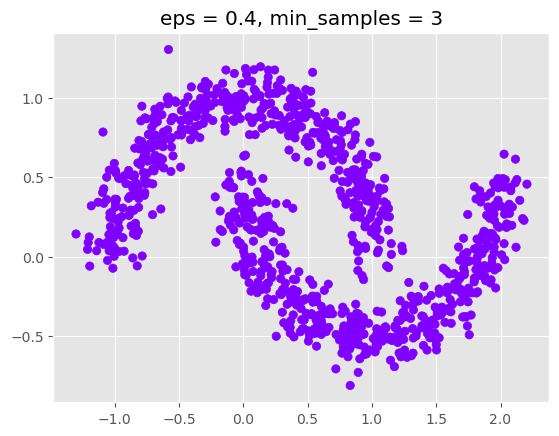

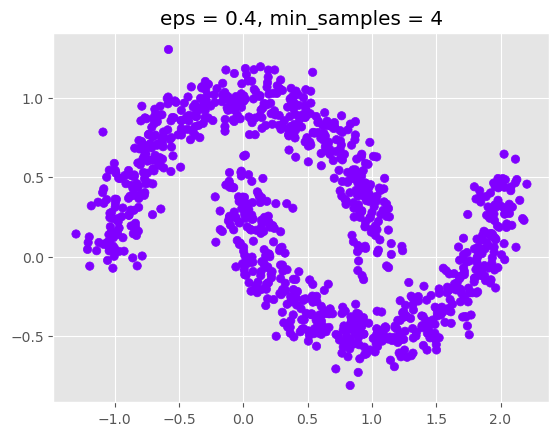

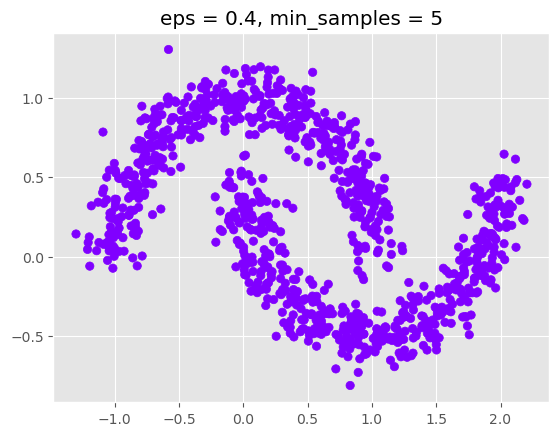

In [27]:
# create dbscan clustering for each combination of eps and min_samples & plot the clusters
for e in epsilon:
    for s in samples:
        dbscan_moons = DBSCAN(eps=e, min_samples=s)
        labels_moon = dbscan_moons.fit_predict(X_df[['X1', 'X2']])
        plt.scatter(X_df['X1'], X_df['X2'], c=labels_moon, cmap='rainbow')
        plt.title('eps = {}, min_samples = {}'.format(e, s))
        plt.show()

# Case Study 3: DBSCAN Clustering

In [29]:
# create a dataset with 4 blobs
X,y = make_blobs(n_samples=1000, centers=4, n_features=2, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

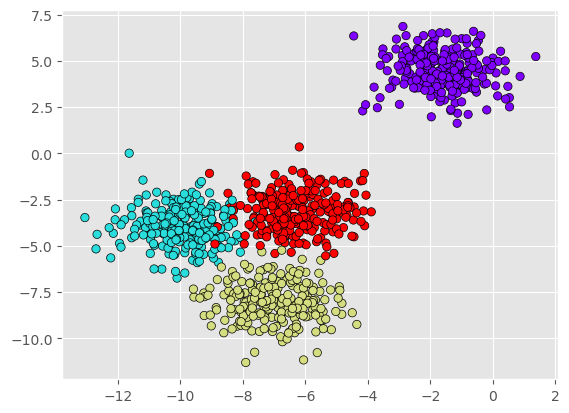

In [30]:
# plot a scatter plot of the dataset
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow',edgecolors='k');

In [45]:
epsilon = [0.1, 0.2, 0.3, 0.4]
samples = [2, 3, 4, 5]

In [46]:
# instantiate a DBSCAN model object and fit it to the dataset
from sklearn.metrics import silhouette_score
sil_score = []
eps_sample_combo = []
for e in epsilon:
    for s in samples:
        dbscan_blobs = DBSCAN(eps=e, min_samples=s)
        labels_blobs = dbscan_blobs.fit_predict(X)
        sil_score.append(silhouette_score(X, labels_blobs))
        eps_sample_combo.append((f'{e}-{s}'))

In [47]:
sil_score

[-0.264407903473018,
 -0.5890090963673876,
 -0.7227756444493878,
 -0.6324651984947887,
 -0.0824441607873627,
 -0.1953224637687697,
 -0.21688943606783936,
 -0.3269394843199473,
 -0.2724995328286034,
 -0.2603696665392242,
 -0.0570271728111605,
 -0.04292208282321947,
 -0.21493424043304443,
 -0.17851335796392648,
 -0.07609342805936214,
 0.23420271957179592]

In [48]:
eps_sample_combo

['0.1-2',
 '0.1-3',
 '0.1-4',
 '0.1-5',
 '0.2-2',
 '0.2-3',
 '0.2-4',
 '0.2-5',
 '0.3-2',
 '0.3-3',
 '0.3-4',
 '0.3-5',
 '0.4-2',
 '0.4-3',
 '0.4-4',
 '0.4-5']

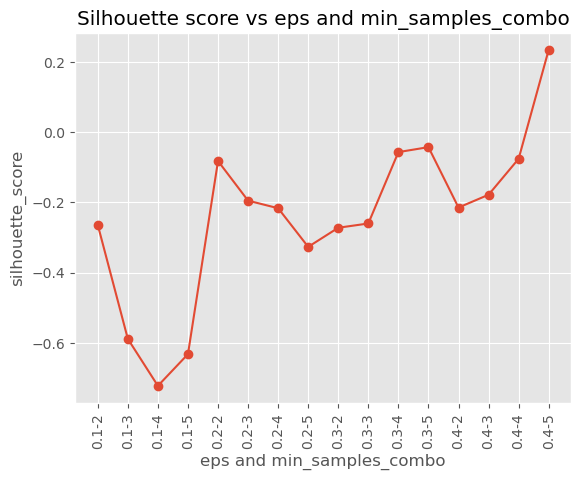

In [49]:
# plot the lineplot of silhouette score vs eps and min_samples

plt.plot(eps_sample_combo, sil_score,marker='o')
plt.xticks(rotation=90)
plt.xlabel('eps and min_samples_combo')
plt.ylabel('silhouette_score')
plt.title('Silhouette score vs eps and min_samples_combo');

In [50]:
# use the best combination of eps and min_samples  epsilon = 0.4 and samples = 5
dbscan_0_4_5 = DBSCAN(eps=0.4, min_samples=5)
labels_blobs = dbscan_0_4_5.fit_predict(X)
labels_blobs

array([ 0,  1,  2,  3,  1,  3,  3,  3,  2,  0,  0,  3,  2,  2, -1,  3,  3,
        0,  3,  1,  0,  3,  0,  2,  0,  3,  1, -1,  2, -1,  1,  1,  1,  1,
        2,  2,  2,  2,  0,  0, -1,  2,  0,  3,  1,  1,  3,  4,  1,  1,  2,
       -1,  3,  0, -1,  3,  3,  0,  1,  2,  1,  1,  3, -1,  0,  2,  2,  2,
        2,  1,  3,  1,  3,  3,  1,  2,  3, -1,  2,  3,  1,  1,  0,  2,  2,
        0,  2,  1,  2,  3,  1, -1,  3,  2,  3,  3,  2,  0,  3,  0,  3,  1,
        2,  3,  0,  3,  0,  3,  3,  2,  3,  3,  0,  2,  1,  3,  2,  3,  0,
        0,  3, -1,  3,  3, -1, -1,  2,  1,  2,  2,  2,  0,  2, -1,  5,  3,
       -1, -1,  1,  3,  1,  0,  3,  3, -1,  2,  3,  0,  0,  1,  0, -1,  1,
        2,  0,  3,  0,  0, -1,  1,  1,  3, -1, -1,  0,  0, -1, -1, -1,  3,
        0,  0,  1,  1,  0,  0,  3,  3,  1,  1,  0,  1,  3,  0,  1,  2,  1,
        3, -1,  2,  2,  1,  3,  1,  3, -1,  0,  0,  2,  3,  3,  1,  1,  0,
        3,  3,  0,  2,  0,  2,  3,  2,  6, -1,  1, -1, -1,  2, -1, -1,  3,
        1,  1,  3,  2,  1

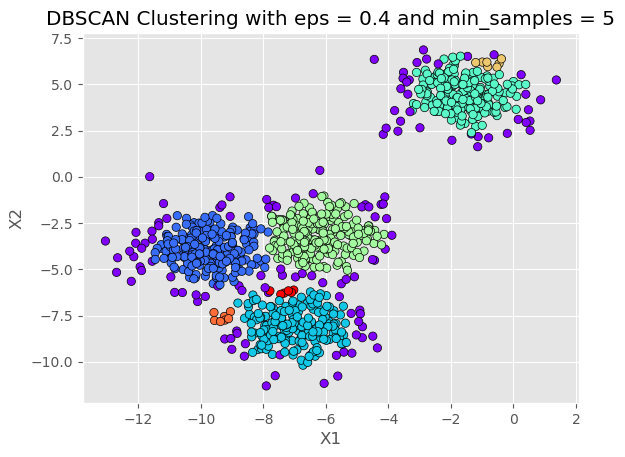

In [40]:
# plot the clusters
plt.scatter(X[:,0], X[:,1], c=labels_blobs, cmap='rainbow',edgecolors='k');
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('DBSCAN Clustering with eps = 0.4 and min_samples = 5');
